### Prosper Loan Data Exploration

#### By Fori Joseph


## Table of Contents
<ol>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a>
   <ul>
        <li>Univariate Plots</li>
        <li>Bivariate Plots</li>
        <li>Multivariate Plots</li>
    <ul>
 </li>   
<li><a href="#conclusions">Conclusions</a></li>
</ol>

<a id='intro'></a>
## Introduction

In [1]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load the dataset into a pandas dataframe
loan = pd.read_csv('prosperLoanData.csv')

In [3]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

> The dataset contains 113,937 loan loan records with 81 columns.

>I'll be paying special attention to the Borrower Rate and the Borrower Annual Percentage Rates and the factors that have an effect on them.

>Particaularly factors such as Employment Status and Loan Term are more important to me.

In [4]:
# Select a subset of data to work with
cols = ['LoanOriginalAmount','LoanStatus','ListingCategory (numeric)', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term',
        'ProsperRating (Alpha)', 'EmploymentStatus','DebtToIncomeRatio', 'ListingCreationDate','BorrowerRate','IsBorrowerHomeowner']

In [5]:
# View a sample of selected samples
loan[cols].sample(10)

,LoanOriginalAmount,LoanStatus,ListingCategory (numeric),BorrowerAPR,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus,DebtToIncomeRatio,ListingCreationDate,BorrowerRate,IsBorrowerHomeowner
78776,1500,Completed,0,0.12569,2083.333333,36,NaN,Self-employed,0.03,2007-04-17 10:59:15.743000000,0.1140,True
105168,13500,Current,7,0.16686,4583.333333,60,B,Employed,0.21,2014-02-10 10:59:53.750000000,0.1435,True
75535,3000,Completed,1,0.35797,5206.666667,36,HR,Employed,0.21,2012-08-20 05:40:24.840000000,0.3177,True
8339,4000,Current,1,0.33286,2021.916667,36,E,Other,0.83,2013-07-14 16:19:31.183000000,0.2932,False
96438,3000,Current,7,0.30532,2333.333333,36,D,Employed,0.27,2011-09-01 18:34:19.293000000,0.2699,False
53315,7500,Current,1,0.35244,3833.333333,36,E,Full-time,0.16,2011-11-03 13:23:50.390000000,0.3160,False
4123,3500,Current,2,0.27285,7341.666667,36,D,Employed,0.20,2013-04-28 15:33:35.413000000,0.2346,True
86202,25000,Completed,4,0.17445,12500.000000,36,NaN,Full-time,0.08,2008-03-27 20:36:57.257000000,0.1600,False
111453,25000,Current,18,0.19364,23333.333333,60,B,Employed,0.16,2013-07-26 19:30:11.703000000,0.1699,True
46197,3000,Defaulted,0,0.18726,5333.333333,36,NaN,Full-time,0.45,2007-04-18 10:28:34.370000000,0.1800,False


In [6]:
# Check for duplicates
duplicates = loan[cols].duplicated().sum()
print('There are {} duplicate records in the set'.format(duplicates))

There are 871 duplicate records in the set


In [7]:
loan[cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanOriginalAmount         113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   ListingCategory (numeric)  113937 non-null  int64  
 3   BorrowerAPR                113912 non-null  float64
 4   StatedMonthlyIncome        113937 non-null  float64
 5   Term                       113937 non-null  int64  
 6   ProsperRating (Alpha)      84853 non-null   object 
 7   EmploymentStatus           111682 non-null  object 
 8   DebtToIncomeRatio          105383 non-null  float64
 9   ListingCreationDate        113937 non-null  object 
 10  BorrowerRate               113937 non-null  float64
 11  IsBorrowerHomeowner        113937 non-null  bool   
dtypes: bool(1), float64(4), int64(3), object(4)
memory usage: 9.7+ MB


In [8]:
columns = ['LoanStatus','Term','EmploymentStatus','ProsperRating (Alpha)','ListingCategory (numeric)']
for col in columns:
    print(loan[col].unique())

['Completed' 'Current' 'Past Due (1-15 days)' 'Defaulted' 'Chargedoff'
 'Past Due (16-30 days)' 'Cancelled' 'Past Due (61-90 days)'
 'Past Due (31-60 days)' 'Past Due (91-120 days)' 'FinalPaymentInProgress'
 'Past Due (>120 days)']
[36 60 12]
['Self-employed' 'Employed' 'Not available' 'Full-time' 'Other' nan
 'Not employed' 'Part-time' 'Retired']
[nan 'A' 'D' 'B' 'E' 'C' 'AA' 'HR']
[ 0  2 16  1  7 13  6 15 20 19  3 18  8  4 11 14  5  9 17 10 12]


<a id='wrangling'></a>
## Data Wrangling

In [9]:
# Create a copy of the data set
clean_loan = loan.copy()

> Get the columns we wish to work with

In [10]:
# Filter out cols from the original dataframe
clean_loan=clean_loan[cols]

In [11]:
clean_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanOriginalAmount         113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   ListingCategory (numeric)  113937 non-null  int64  
 3   BorrowerAPR                113912 non-null  float64
 4   StatedMonthlyIncome        113937 non-null  float64
 5   Term                       113937 non-null  int64  
 6   ProsperRating (Alpha)      84853 non-null   object 
 7   EmploymentStatus           111682 non-null  object 
 8   DebtToIncomeRatio          105383 non-null  float64
 9   ListingCreationDate        113937 non-null  object 
 10  BorrowerRate               113937 non-null  float64
 11  IsBorrowerHomeowner        113937 non-null  bool   
dtypes: bool(1), float64(4), int64(3), object(4)
memory usage: 9.7+ MB


> Drop duplicate rows from the dataframe

In [12]:
clean_loan = clean_loan.drop_duplicates()

#check if duplicates are gone
duplicates1 = clean_loan.duplicated().sum()
print('There are {} duplicate records in the set'.format(duplicates1))

There are 0 duplicate records in the set


> Rename the ListingCaregory Columb

In [13]:
# Rename the column
clean_loan = clean_loan.rename(columns = {'ListingCategory (numeric)': 'ListingCategory'})

> Rename the listing categories with appropraite titles

In [14]:
# Create a dictionary
category_titles = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
                   4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby & Adoption', 
                   9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
                  13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical or Dental', 16 : 'Motorcycle',
                  17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

# Map the dictionary contents to the ListingCategory column
clean_loan.ListingCategory = clean_loan.ListingCategory.map(category_titles)

# Preview results
clean_loan.ListingCategory.unique()

array(['Not Available', 'Home Improvement', 'Motorcycle',
       'Debt Consolidation', 'Other', 'Household Expenses', 'Auto',
       'Medical or Dental', 'Wedding Loans', 'Vacation', 'Business',
       'Taxes', 'Baby & Adoption', 'Personal Loan', 'Engagement Ring',
       'Large Purchases', 'Student Use', 'Boat', 'RV',
       'Cosmetic Procedure', 'Green Loans'], dtype=object)

> Change ListingCreationDate to DateTime

In [15]:
clean_loan.ListingCreationDate = pd.to_datetime(loan.ListingCreationDate)

# Extract year information from ListingCreationDate column
clean_loan['year']= clean_loan['ListingCreationDate'].dt.year

# Verify results
clean_loan.dtypes[11:13]

IsBorrowerHomeowner     bool
year                   int64
dtype: object

In [16]:
# Convert ProsperRating into an ordered categorical type
rate_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
clean_loan['ProsperRating (Alpha)'] = clean_loan['ProsperRating (Alpha)'].astype(ordered_var)

<a id='eda'></a>
## Exploratory Data Analysis

I'll be looking to Answer the following questions from the data.

* What loan amount is take the most?
* What is the distribution of Borrower APR?
* What Term do Borrowers usually go for?
* What is the Employment status of most borrowers?
* What is the loan status of most loans?
* What is the correlation between BorrowerAPR, Monthly Income, Loan amount & Debt to Income Ratio?
* What is the correlation between each of BorrowerAPR, Monthly Income, Loan amount & Debt to Income Ratio To Both Term & Prosper Rating?
* What is the relationship between Prosper Rating & Term, Employment Status & Term & Prosper Rating and Employment Status?
* How does the Listing Category affect the loan amount taken?
* What is the relationship between Prosper Rating, BorrowerAPR and Loan Term?
* How has the BorrowerAPR changed over time, for people with a verifiable source of income and those without?



### Univariate Plots

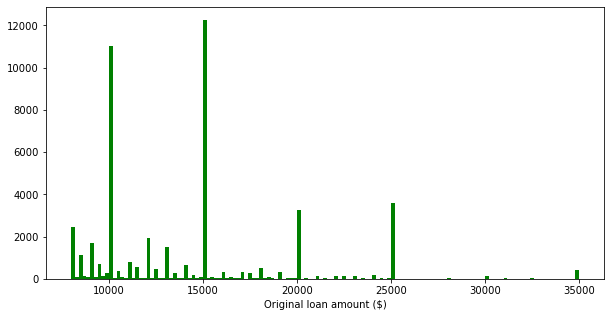

In [17]:
# Plot histogram of loan Original Amount

bins = np.arange(8000, clean_loan.LoanOriginalAmount.max()+200, 200)
plt.figure(figsize=[10, 5])
plt.hist(data = clean_loan, x = 'LoanOriginalAmount', bins = bins, color='green');
plt.xlabel('Original loan amount ($)');

> _USD15K_ is the loan amount taken the most, also it appears that most loans take are a multiple of _USD5K_.

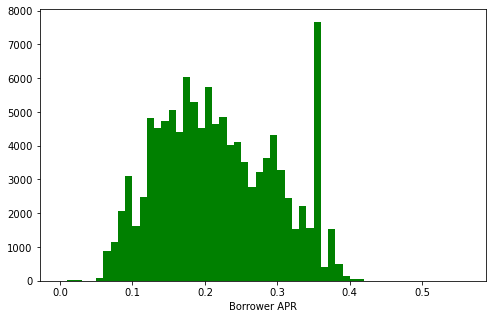

In [18]:
# Plot histogram of Borrower APR

bins = np.arange(0, clean_loan.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = clean_loan, x = 'BorrowerAPR', bins = bins, color='green');
plt.xlabel('Borrower APR');

> Most loans have an APR less than 0.4, with highest peak at 0.35.

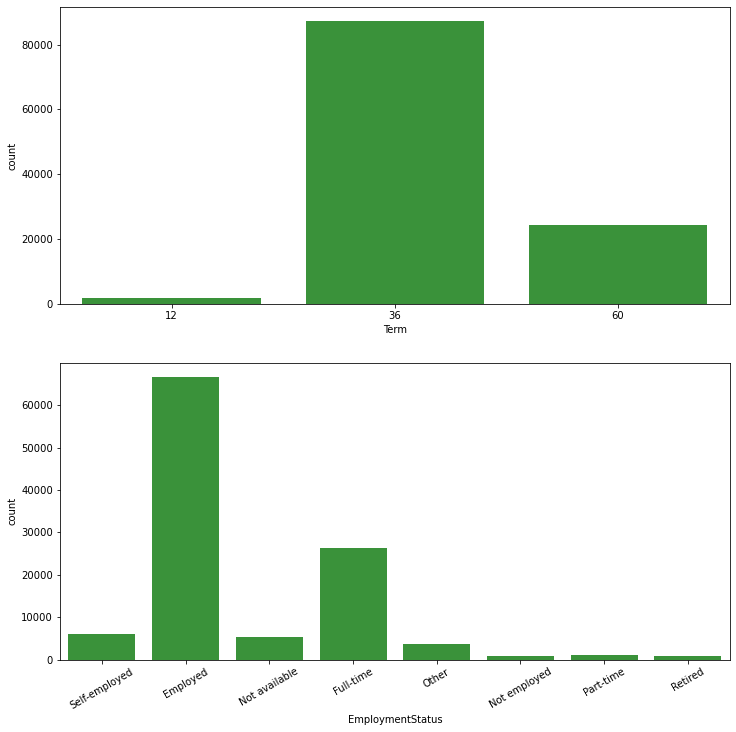

In [19]:
# Plot BarChart of Term and Employment Status

fig, ax = plt.subplots(nrows=2, figsize = [12,12])
default_color = sb.color_palette()[2]
sb.countplot(data = clean_loan, x = 'Term', color = default_color, ax = ax[0])
sb.countplot(data = clean_loan, x = 'EmploymentStatus', color = default_color, ax = ax[1]);
plt.xticks(rotation=30);

> Most people are taking loans with 36 month terms, 60 months is the next best, with very few people opting for 12 months.
Also, Employed people are taking the most loans (This includes self-employed and employed.). This is perhaps due to access

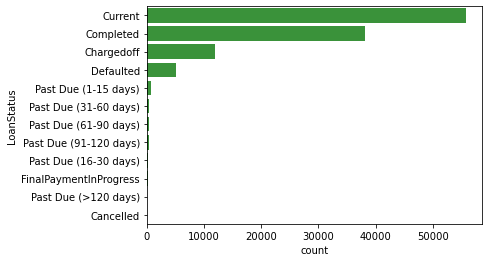

In [20]:
# Order the categorical variable 
status_order=clean_loan.LoanStatus.value_counts().index

# Plot 
sb.countplot(data=clean_loan, y='LoanStatus', order=status_order, color=default_color);

In [21]:
# Aggregate Past Due loans 
clean_loan['LoanStatus'] = clean_loan['LoanStatus'].apply(lambda x: x if 'Past Due' not in x else 'Past Due')

# Convert LoanStatus to a categorical variable
status_dict = ['Defaulted','Chargedoff', 'Past Due', 'Current', 'FinalPaymentInProgress', 'Completed']

loan_status_order = pd.api.types.CategoricalDtype(ordered = True, categories = status_dict)

clean_loan['LoanStatus'] = clean_loan['LoanStatus'].astype(loan_status_order)

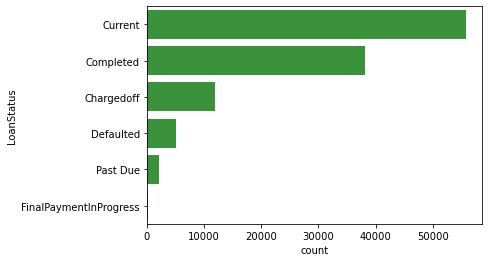

In [22]:
# Order the categorical variable 
status_order=clean_loan.LoanStatus.value_counts().index

# Plot 
sb.countplot(data=clean_loan, y='LoanStatus', order=status_order, color=default_color);

> Unsurprisingly, most loan status' are in Current, with next largest chunk being completed. It's safe to say that the largest percentage of people who take these loans pay them back successfully.

### Bivariate Plots

In [23]:
# Store numeric column names in a list
numeric_cols = ['DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'BorrowerAPR']

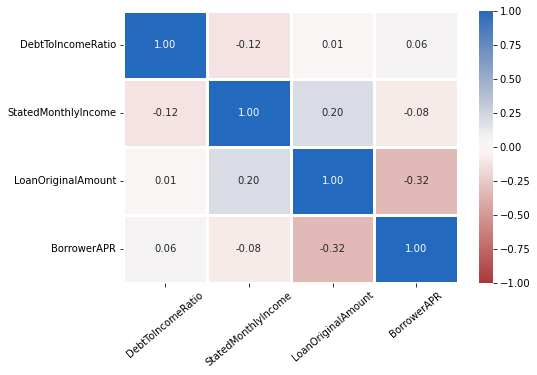

In [24]:
# Visualize the correlation between the numeric variables with a heatmap
plt.figure(figsize= (7.5, 5))
sb.heatmap(data=clean_loan[numeric_cols].corr(), annot=True, fmt='.2f', 
            cmap='vlag_r', vmin=-1, vmax=1, linewidth=3)
plt.xticks(rotation=40);

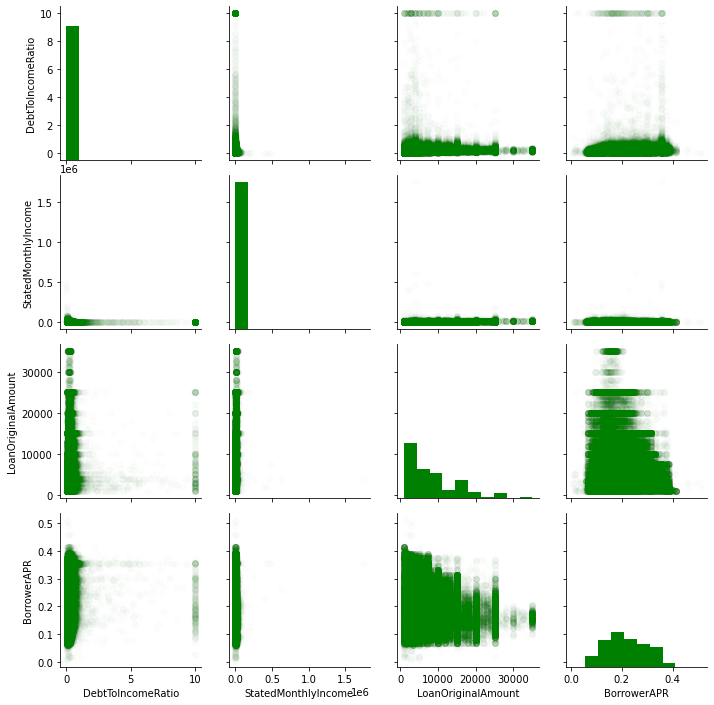

In [25]:
# Create a scatterplot of each numeric variable against the other
fig = sb.PairGrid(clean_loan[numeric_cols])
fig.map_diag(plt.hist, color = 'green')
fig.map_offdiag(plt.scatter, color = 'green', alpha=0.01);

> Loan Original amount and Stated monthly income have a positive correlation coefficient of 0.20, this is expected as it proves that people with higher income tend to take higher loans. On the other hand Stated monthly income and Borrower APR have a negative correlation coefficient of -0.32 which shows that the lower the loan amount, the higher the APR. Debt to income ratio is also negatively correlated to StatedMonthly Income. 

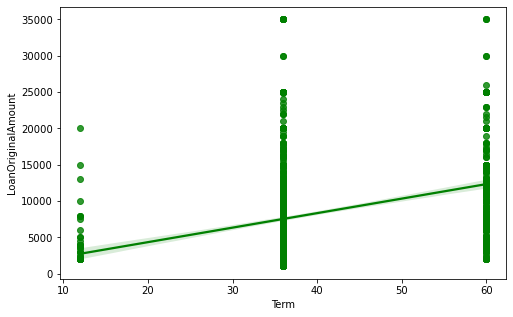

In [26]:
plt.figure(figsize=(8, 5))
sb.regplot(data=clean_loan.sample(2000, random_state=1), x='Term', y='LoanOriginalAmount', color = 'green');

#### Relation between Borrower Rate and employment status, Collatera and Wage Group

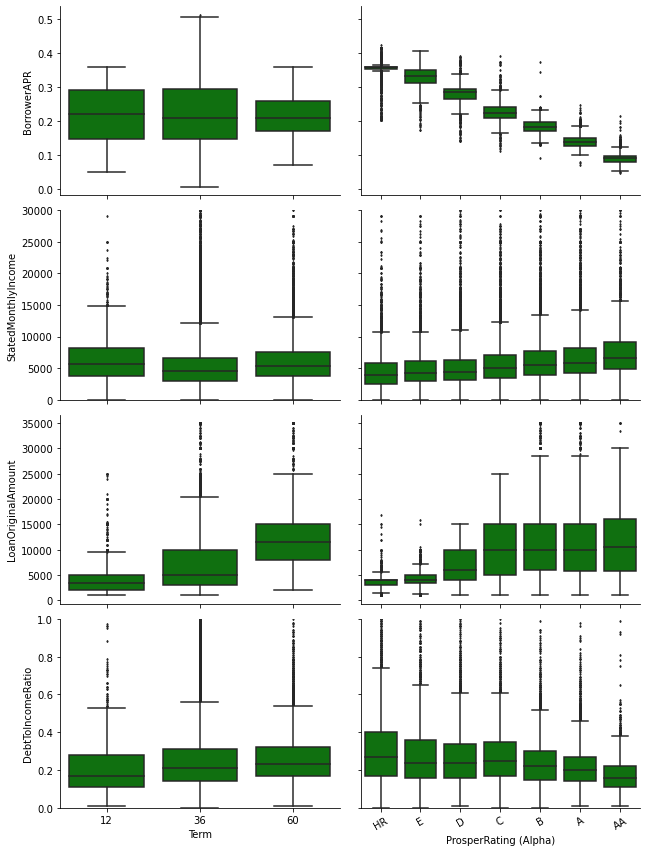

In [27]:
# Create a list of columns to plot on each pairgrid axis
x_cols = ['Term','ProsperRating (Alpha)']
y_cols = ['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount','DebtToIncomeRatio']


# Create a custom PairGrid with column lists specified
fig = sb.PairGrid(data = clean_loan, y_vars = y_cols, x_vars = x_cols, height = 3, aspect=1.5)
fig.map(sb.boxplot, color='green', fliersize=1.5)

# Limit the y axis of stated monthly income to 0 - 30000
for ax in fig.axes[1, :]:
    ax.set_ylim(0, 30000)

# Limit the y axis of debt income ratio to 0 - 1
for ax in fig.axes[3, :]:
    ax.set_ylim(0, 1)

plt.xticks(rotation=30);

> The diagram shows that the better the Prosper Rating, the lower the APR. This is demonstrated by AA, A & B ratings having the lower APRs. It also shows that Term increases the higher the loan amount gets. Also a higher monthly income tends to mean a better ProsperRating.

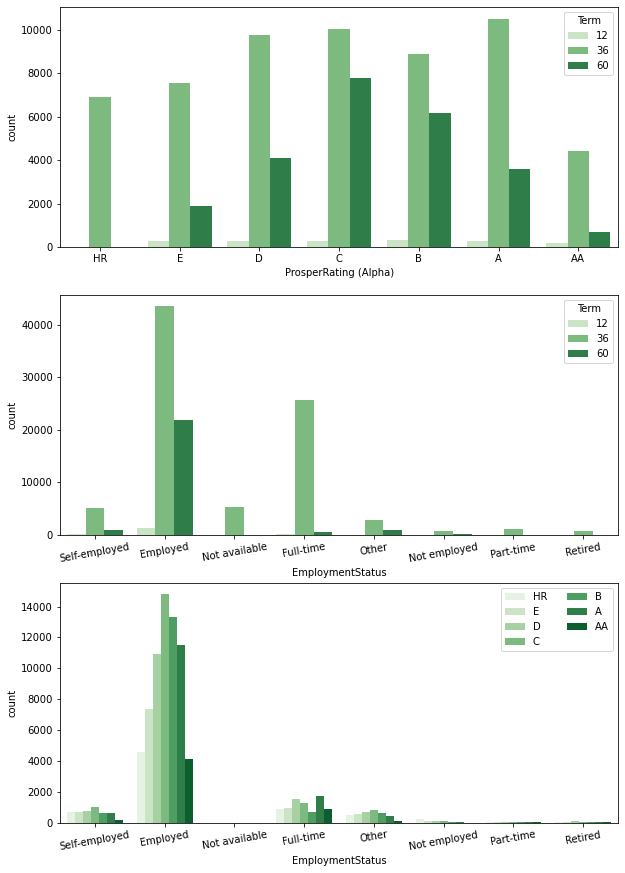

In [28]:
plt.figure(figsize = [10, 15])

# subplot 1: Prosper rating vs term
plt.subplot(3, 1, 1)
sb.countplot(data = clean_loan, x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'Greens')

# subplot 2: employment status vs. term
ax = plt.subplot(3, 1, 2)
sb.countplot(data = clean_loan, x = 'EmploymentStatus', hue = 'Term', palette = 'Greens')
plt.xticks(rotation=10)

# subplot 3: Prosper rating vs. employment status, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = clean_loan, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'Greens')
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping
plt.xticks(rotation=10);

> There doesn't seem to be a strong relationship between Prosper Rating and the term of the loan, a difference is noticed only on HR loans, where only 36 month loans were taken.
There isn't enough information on non-employed people to notice any pattern.

<AxesSubplot:xlabel='ListingCategory', ylabel='LoanOriginalAmount'>

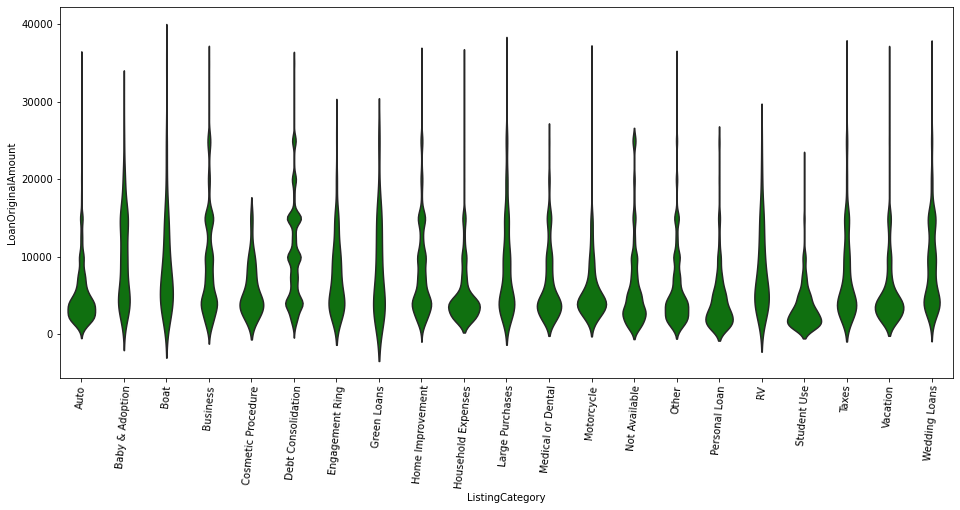

In [29]:
# Create Violinplot visual
plt.figure(figsize=(16, 15))
plt.subplot(2,1,1)
plt.xticks(rotation= 85);
sb.violinplot(data=clean_loan.sort_values(by='ListingCategory'), x='ListingCategory', y='LoanOriginalAmount', inner=None,
               color='green')

> Students seem to apply for the smallest loans, while the largest loans appear to be for weddings, Home improvement, Household expenses, Boats, Debt consolidation, Large Purchases and Business.

### Multivariate Plots

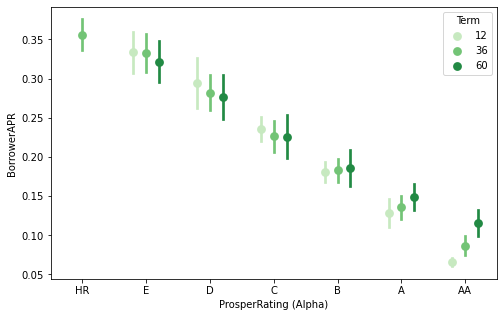

In [34]:
#plot pointplot 
fig = plt.figure(figsize = [8,5])
ax = sb.pointplot(data = clean_loan, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Greens', linestyles = '',dodge = 0.4, ci='sd')

> As we already established earlier, BorrowerAPR is negatively correlated to ProsperRating, but here we see that Term is postively correlated to BorrowerAPR, i.e. the longer the term, the higher the rate.

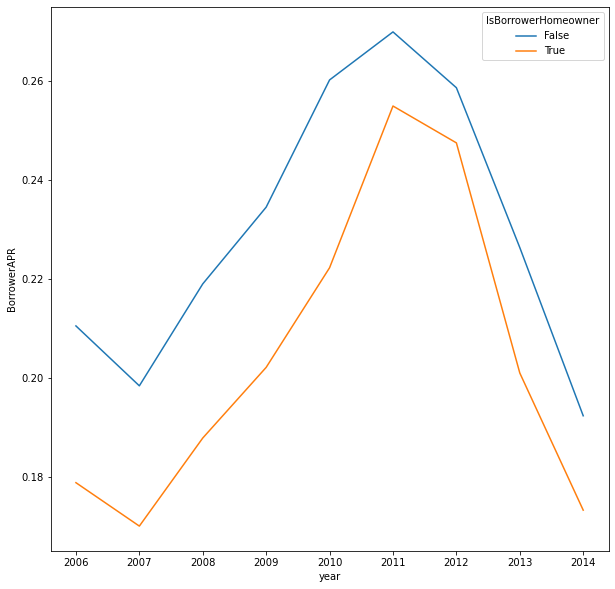

In [33]:
# plots the lineplot to analyze homeowner's and non-homeowner's rate over time
plt.figure(figsize=(10,10))
g=sb.lineplot(data=clean_loan, x='year', y='BorrowerAPR', hue='IsBorrowerHomeowner',ci=None);

> Overtime the rate charged to homeowners has been consitently lower than that charged to non-homeowners. This shows that possessing some form of collateral improves lender confidence and thus leads to a lower rate.

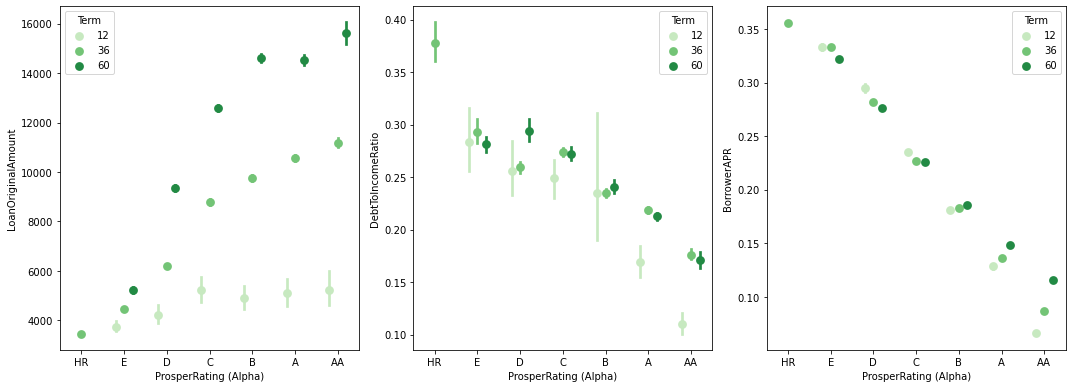

In [32]:
# Create a list of columns to plot on the y-axis
y_columns = ['LoanOriginalAmount','DebtToIncomeRatio', 'BorrowerAPR']
# Create a list of color palettes
palettes = ['Greens','Greens','Greens']

plt.figure(figsize=(15, 5.5))

for col, index, colors in zip(y_columns, range(3), palettes):
    plt.subplot(1, 3, index+1)
    sb.pointplot(data=clean_loan, x='ProsperRating (Alpha)', y=col, hue='Term', 
                  linestyles='', palette= colors, dodge=0.4)
plt.tight_layout();

> Both Borrower APR and Debt to Income Ratio have negative correlations with Prosper Rating and terms of those loans tend to follow the same pattern. Loan original amount on the other hand appears positvely correlated with Prospoer Rating, but here Term seems to have its own effect as higher amounts tend to lead to longer terms regardless of the Prosper Rating

<a id='conclusions'></a>
## Conclusion

From our explorations above we were able to notice the following major points.

* Most loans were taken in multiples of USD5K, and most of the loans were taken by the employed.
* A persons financial standing greatly affects the rates that they get on their loans. We see this from the effect that the prosper rating has on Borrower APR and the effect that being a homeowner has on Borrower Rate. This is also further seen on the relationship between stated monthly income and prosper rating.
* The greatest motivation for taking a loan seems to be for luxury purchases, items such as boats, weddings, motorcycles, home improvement, vacations and engagement rings are very promininent reasons for taking loans. Other than those, Business and Debt consolidation seem to be the more pragmatic reasons for taking a loan.

For further research, I'd like to look deeper into the factors that affect delinquencies.